In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
from DataCleaning import open_and_manage
from Main_abdellah import abdellah

In [167]:
url = "../quick_clean.csv"
df = open_and_manage(url)

# Correlation


 number of rows and columns in the data matrix
(19855, 73)

 number of rows and columns in the quantitative data matrix
(19855, 6)


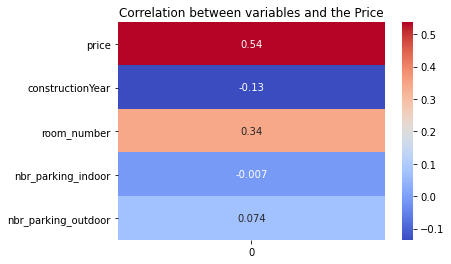


	the variables with the greatest influence on the target variable:
                            0
price                0.536121
room_number          0.342929
nbr_parking_outdoor  0.074067

	 the variables with the least influence on the target variable :
                           0
constructionYear   -0.134425
nbr_parking_indoor -0.007005


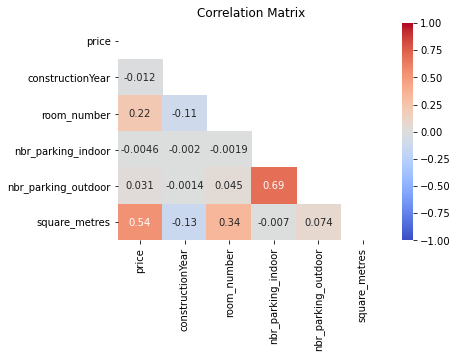


the Percentage of missing values per column in the quantitave variables :
price                  0.000353
constructionYear       0.000201
room_number            0.000101
nbr_parking_indoor     0.645379
nbr_parking_outdoor    0.722085
square_metres          0.000000
dtype: float64


In [134]:
abdellah(url)

# Interpretation

In [135]:
# pd.options.display.max_columns = None
df.tail()

,id,type,subtype,price,zip_code,cuisine_type,constructionYear,condition,heatingType,room_number,...,subtype_mansion,subtype_mixed use building,subtype_other property,subtype_penthouse,subtype_service flat,subtype_town house,subtype_triplex,subtype_villa,type_apartment,type_house
19850,8128634,house,house,435200.0,2550,hyper equipped,2019.0,as new,gas,3.0,...,0,0,0,0,0,0,0,0,0,1
19851,8907618,house,house,420000.0,5640,No infos,NaN,as new,fueloil,0.0,...,0,0,0,0,0,0,0,0,0,1
19852,8954484,house,mansion,450000.0,2018,No infos,NaN,as new,fueloil,6.0,...,1,0,0,0,0,0,0,0,0,1
19853,9001418,house,apartment block,450000.0,9500,installed,NaN,to be done up,gas,5.0,...,0,0,0,0,0,0,0,0,0,1
19854,8907992,house,house,420000.0,5621,No infos,NaN,to be done up,fueloil,0.0,...,0,0,0,0,0,0,0,0,0,1


In [136]:
df.shape

(19855, 73)

# Are there any outliers? If yes, which ones and why?

### Rooms

In [137]:
room_outliers = df[np.abs(df.room_number-df.room_number.mean()) > (3*df.room_number.std())]
room_outliers[["id","room_number","square_metres"]].sort_values(by="room_number", ascending=False).head()

,id,room_number,square_metres
6283,8715085,204.0,204
8103,8919065,204.0,204
7814,8818453,204.0,204
17491,8784255,165.0,165
18089,8951414,100.0,8800


Text(0.5, 1.0, 'Distribution of room number')

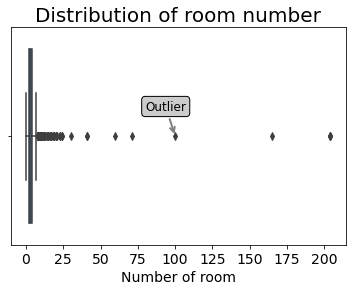

In [138]:
# box plot of the variable room_number
ax = sns.boxplot(df.room_number)

# notation indicating an outlier
ax.annotate('Outlier', xy=(100,0), xytext=(80,-0.12), fontsize=12,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))

# xtick, label, and title
plt.xticks(fontsize=14)
plt.xlabel('Number of room', fontsize=14)
plt.title('Distribution of room number', fontsize=20)

### Parkings

In [139]:
parking_in_outliers = df[np.abs(df.nbr_parking_indoor-df.nbr_parking_indoor.mean()) > (3*df.nbr_parking_indoor.std())]
parking_in_outliers[["id","nbr_parking_indoor","square_metres"]].head()

,id,nbr_parking_indoor,square_metres
3226,8944138,35000.0,106


Text(0.5, 1.0, 'Distribution of indoor parking')

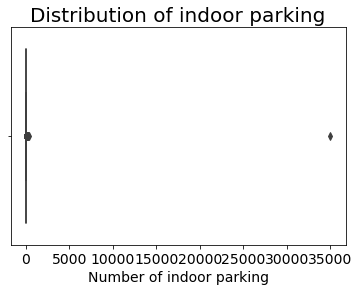

In [140]:
ax = sns.boxplot(df.nbr_parking_indoor)
plt.xticks(fontsize=14)
plt.xlabel('Number of indoor parking', fontsize=14)
plt.title('Distribution of indoor parking', fontsize=20)

In [141]:
parking_out_outliers = df[np.abs(df.nbr_parking_outdoor-df.nbr_parking_outdoor.mean()) > (3*df.nbr_parking_outdoor.std())]
parking_out_outliers[["id","nbr_parking_outdoor","square_metres"]].sort_values(by="nbr_parking_outdoor", ascending=False).head(10)

,id,nbr_parking_outdoor,square_metres
678,8372213,250.0,93
470,8773002,250.0,69
520,9007599,250.0,83
356,8318891,202.0,84
193,8972719,109.0,69
77,9007296,100.0,118
5460,9027328,100.0,65
5053,8978908,100.0,90
14981,8869798,100.0,850
15958,8489907,100.0,655


Text(0.5, 1.0, 'Distribution of outdoor parking')

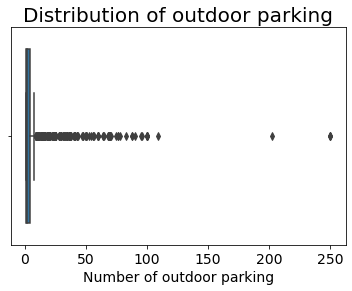

In [142]:
ax = sns.boxplot(df.nbr_parking_outdoor)
plt.xticks(fontsize=14)
plt.xlabel('Number of outdoor parking', fontsize=14)
plt.title('Distribution of outdoor parking', fontsize=20)

### Price by m²

In [143]:
price_outliers = df[np.abs(df.price_by_m2-df.price_by_m2.mean()) > (3*df.price_by_m2.std())]
price_outliers[["id","price_by_m2","square_metres"]].sort_values(by="price_by_m2", ascending=False).head(10)

,id,price_by_m2,square_metres
8210,8897106,1.375000e+06,4
18860,8826655,1.100000e+06,3
741,8403485,1.045000e+06,1
14367,9021889,1.000000e+06,4
4754,8859942,9.750000e+05,1
19652,8859366,9.250000e+05,2
8213,9009029,8.350000e+05,1
19661,8332018,7.375000e+05,4
17203,8700108,7.071429e+05,7
16483,8187164,7.000000e+05,5


Text(0.5, 1.0, 'Distribution of Price by m²')

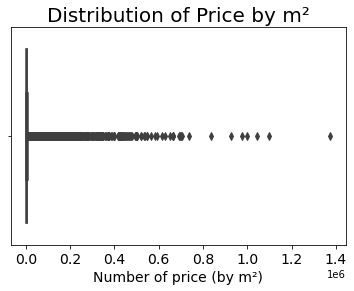

In [144]:
ax = sns.boxplot(df.price_by_m2)
plt.xticks(fontsize=14)
plt.xlabel('Number of price (by m²)', fontsize=14)
plt.title('Distribution of Price by m²', fontsize=20)

In [145]:
print(f"Number of room outliers : {len(room_outliers)}")
print(f"Number of indoor parking outliers : {len(parking_in_outliers)}")
print(f"Number of outdoor parking outliers : {len(parking_out_outliers)}")
print(f"Number of outdoor parking outliers : {len(price_outliers)}")

Number of room outliers : 44
Number of indoor parking outliers : 1
Number of outdoor parking outliers : 85
Number of outdoor parking outliers : 360


# Which variables would you delete and why ?

### Rooms

In [146]:
# Delete rows when the number of room is equals or greater than square meters
df = df[df.room_number < df.square_metres]
df[["id","room_number","square_metres","price"]].sort_values(by="room_number", ascending=False)

,id,room_number,square_metres,price
18089,8951414,100.0,8800,15000000.0
15436,8820666,60.0,8521,1100000.0
10481,7701432,41.0,2049,5200000.0
10482,7701433,41.0,2049,5200000.0
11243,9029547,30.0,415,550000.0
...,...,...,...,...
3810,8997835,0.0,41,170000.0
18359,9021045,0.0,296,120000.0
18357,8912294,0.0,93,139000.0
3788,8960382,0.0,40,99000.0


### Parkings

In [147]:
# Delete rows when the number of parking indoor is equals or greater than square meters
df = df[(df.nbr_parking_indoor < df.square_metres) | (df.nbr_parking_indoor.isna())]
df[["id","nbr_parking_indoor","square_metres","price"]].sort_values(by="nbr_parking_indoor", ascending=False)

,id,nbr_parking_indoor,square_metres,price
1521,8956263,126.0,238,775000.0
4459,8956261,126.0,164,625000.0
513,9019385,100.0,110,259000.0
561,8479154,95.0,96,366250.0
5700,8411268,70.0,182,695000.0
...,...,...,...,...
19847,8822100,NaN,168,398050.0
19850,8128634,NaN,140,435200.0
19851,8907618,NaN,1000,420000.0
19852,8954484,NaN,253,450000.0


In [148]:
# Delete rows when the number of parking outdoor is equals or greater than square meters
df = df[(df.nbr_parking_outdoor < df.square_metres) | (df.nbr_parking_outdoor.isna())]
df[["id","nbr_parking_outdoor","square_metres","price"]].sort_values(by="nbr_parking_outdoor", ascending=False)

,id,nbr_parking_outdoor,square_metres,price
77,9007296,100.0,118,318000.0
15958,8489907,100.0,655,750000.0
14981,8869798,100.0,850,2900000.0
561,8479154,95.0,96,366250.0
6614,8874517,76.0,86,249500.0
...,...,...,...,...
19847,8822100,NaN,168,398050.0
19850,8128634,NaN,140,435200.0
19851,8907618,NaN,1000,420000.0
19852,8954484,NaN,253,450000.0


### Price by m²

In [149]:
# keep only the ones that are within +3 to -3 standard deviations in the column 'price_by_m2'.
df = df[np.abs(df.price_by_m2-df.price_by_m2.mean()) <= (3*df.price_by_m2.std())]
df

,id,type,subtype,price,zip_code,cuisine_type,constructionYear,condition,heatingType,room_number,...,subtype_mansion,subtype_mixed use building,subtype_other property,subtype_penthouse,subtype_service flat,subtype_town house,subtype_triplex,subtype_villa,type_apartment,type_house
2,9039019,apartment,apartment,1550000.0,1050,usa hyper equipped,2017.0,as new,gas,3.0,...,0,0,0,0,0,0,0,0,1,0
3,9043036,apartment,apartment,195000.0,9600,installed,2014.0,good,gas,2.0,...,0,0,0,0,0,0,0,0,1,0
4,9042073,apartment,apartment,320000.0,1070,usa hyper equipped,2017.0,as new,gas,3.0,...,0,0,0,0,0,0,0,0,1,0
5,9034494,apartment,apartment,715000.0,1950,usa hyper equipped,2020.0,as new,gas,2.0,...,0,0,0,0,0,0,0,0,1,0
6,9042950,apartment,triplex,235000.0,6010,hyper equipped,2013.0,as new,gas,3.0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19847,8822100,house,house,398050.0,1630,No infos,2021.0,good,gas,3.0,...,0,0,0,0,0,0,0,0,0,1
19850,8128634,house,house,435200.0,2550,hyper equipped,2019.0,as new,gas,3.0,...,0,0,0,0,0,0,0,0,0,1
19851,8907618,house,house,420000.0,5640,No infos,NaN,as new,fueloil,0.0,...,0,0,0,0,0,0,0,0,0,1
19852,8954484,house,mansion,450000.0,2018,No infos,NaN,as new,fueloil,6.0,...,1,0,0,0,0,0,0,0,0,1


# In your opinion, which 5 variables are the most important and why?

### A discuter  
prix/m2  
city+region  
condition  

# What are the most and less expensive regions in Belgium?

Text(0, 0.5, 'Price bu m²')

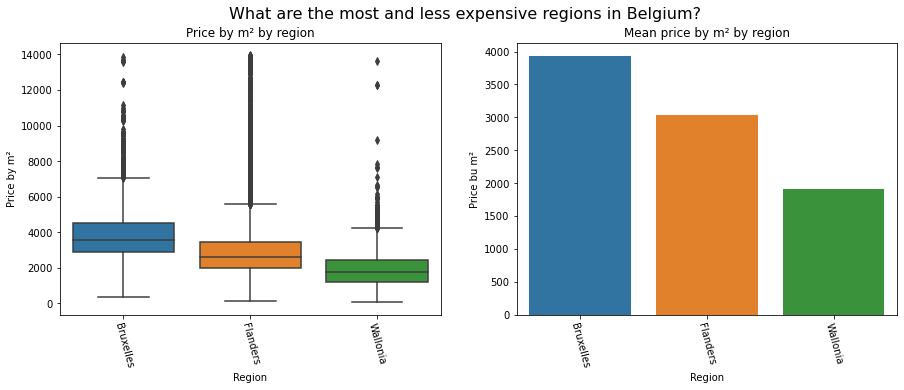

In [150]:
plt.figure(1, figsize=(15,5))
plt.suptitle("What are the most and less expensive regions in Belgium?", fontsize=16)

cities = df[["city","price_by_m2","region"]]
plt.subplot(121)
sns.boxplot(x="region", y="price_by_m2", data=cities)
plt.xticks(rotation=-75)
plt.title("Price by m² by region")
plt.xlabel("Region")
plt.ylabel("Price by m²")

cities = df.groupby(by="region")
cities = cities["price_by_m2"].agg(np.mean)
cities = pd.DataFrame(cities)
cities["region"] = cities.index 
cities.sort_values(by="price_by_m2", ascending=False, inplace=True)
plt.subplot(122)
sns.barplot(x="region", y="price_by_m2", data=cities.head())
plt.xticks(rotation=-75)
plt.title("Mean price by m² by region")
plt.xlabel("Region")
plt.ylabel("Price bu m²")

*As you can see in the graphs above, Brussels is the most expensive region and Wallonia is the cheapest, but Flanders has the most extreme values.*

# What are the most and less expensive provinces un Belgium?

Text(0, 0.5, 'Price bu m²')

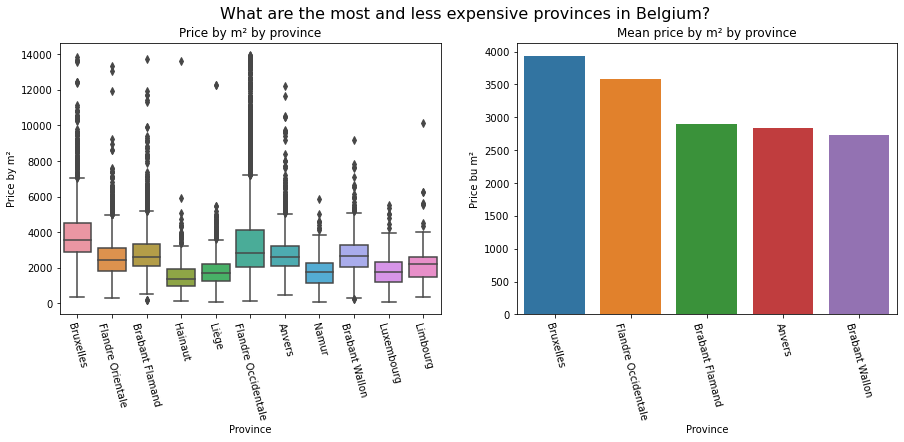

In [151]:
plt.figure(1, figsize=(15,5))
plt.suptitle("What are the most and less expensive provinces in Belgium?", fontsize=16)

cities = df[["city","price_by_m2", "municipalities"]]
plt.subplot(121)
sns.boxplot(x="municipalities", y="price_by_m2", data=cities)
plt.xticks(rotation=-75)
plt.title("Price by m² by province")
plt.xlabel("Province")
plt.ylabel("Price by m²")

cities = df.groupby(by="municipalities")
cities = cities["price_by_m2"].agg(np.mean)
cities = pd.DataFrame(cities)
cities["municipalities"] = cities.index 
cities.sort_values(by="price_by_m2", ascending=False, inplace=True)
plt.subplot(122)
sns.barplot(x="municipalities", y="price_by_m2", data=cities.head())
plt.xticks(rotation=-75)
plt.title("Mean price by m² by province")
plt.xlabel("Province")
plt.ylabel("Price bu m²")

*Here, Brussels is always the most expensive. Western Flanders are next, which can be explained by the high price of seaside flats. Indeed, West Flanders has the most extreme values.*

# What are the most expensive municipalities in Belgium?

Text(0, 0.5, 'Price')

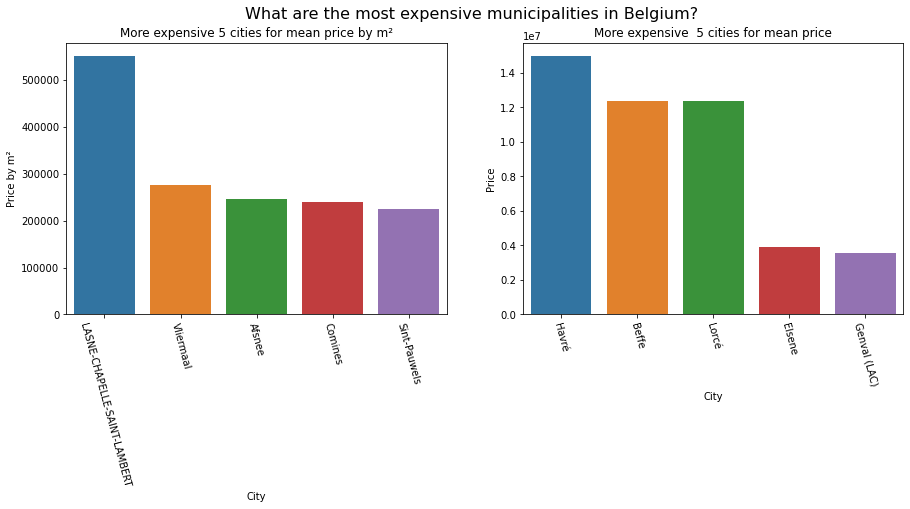

In [168]:
plt.figure(1, figsize=(15,5))
plt.suptitle("What are the most expensive municipalities in Belgium?", fontsize=16)

cities = df.groupby(by="city")
cities = cities["price_by_m2"].agg(np.mean)
cities = pd.DataFrame(cities)
cities["city"] = cities.index 
cities.reset_index(drop=True)
cities.sort_values(by="price_by_m2", ascending=False, inplace=True)
plt.subplot(121)
sns.barplot(x="city", y="price_by_m2", data=cities.head())
plt.xticks(rotation=-75)
plt.title("More expensive 5 cities for mean price by m²")
plt.xlabel("City")
plt.ylabel("Price by m²")


cities = df.groupby(by="city")
cities = cities["price"].agg(np.mean)
cities = pd.DataFrame(cities)
cities["city"] = cities.index 
cities.sort_values(by="price", ascending=False, inplace=True)
plt.subplot(122)
sns.barplot(x="city", y="price", data=cities.head())
plt.xticks(rotation=-75)
plt.title("More expensive  5 cities for mean price")
plt.xlabel("City")
plt.ylabel("Price")

*Here are the top 5 most expensive cities in Belgium. Many parameters can influence prices, so the graph on the right is not relevant for a comparison. You have to look at the graph on the left where we average the price by square meters, and you can see that the most expensive city is Lasne.*

# What are the less expensive municipalities in Belgium?

Text(0, 0.5, 'Price')

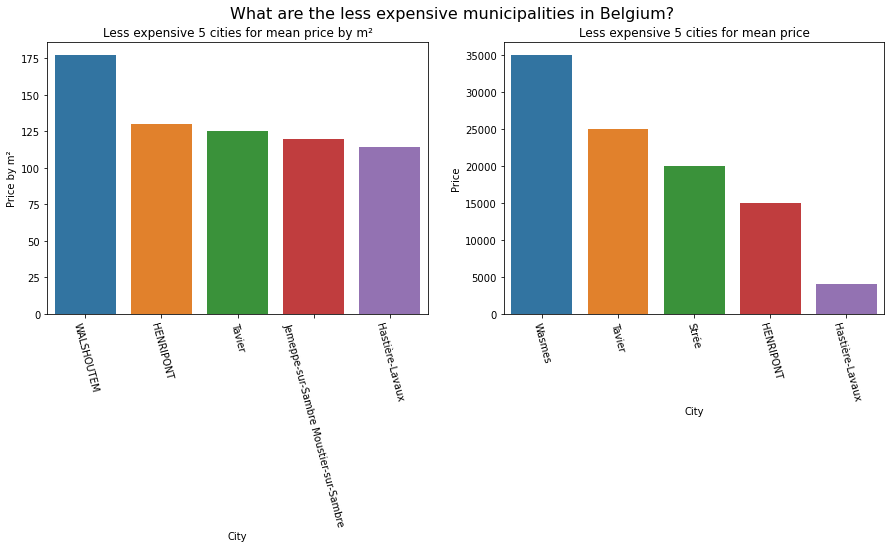

In [153]:
plt.figure(1, figsize=(15,5))
plt.suptitle("What are the less expensive municipalities in Belgium?", fontsize=16)

cities = df.groupby(by="city")
cities = cities["price_by_m2"].agg(np.mean)
cities = pd.DataFrame(cities)
cities["city"] = cities.index 
cities.sort_values(by="price_by_m2", ascending=False, inplace=True)
plt.subplot(121)
sns.barplot(x="city", y="price_by_m2", data=cities.tail())
plt.xticks(rotation=-75)
plt.title("Less expensive 5 cities for mean price by m²")
plt.xlabel("City")
plt.ylabel("Price by m²")


cities = df.groupby(by="city")
cities = cities["price"].agg(np.mean)
cities = pd.DataFrame(cities)
cities["city"] = cities.index 
cities.sort_values(by="price", ascending=False, inplace=True)
plt.subplot(122)
sns.barplot(x="city", y="price", data=cities.tail())
plt.xticks(rotation=-75)
plt.title("Less expensive 5 cities for mean price")
plt.xlabel("City")
plt.ylabel("Price")

*It is the same for the top 5 cheapest cities, only the graph on the right is relevant.
We have not made a graph based on the median because there are too many cities and therefore it was not possible.*

# What are the most expensive municipalities in Wallonia?

Text(0, 0.5, 'Price')

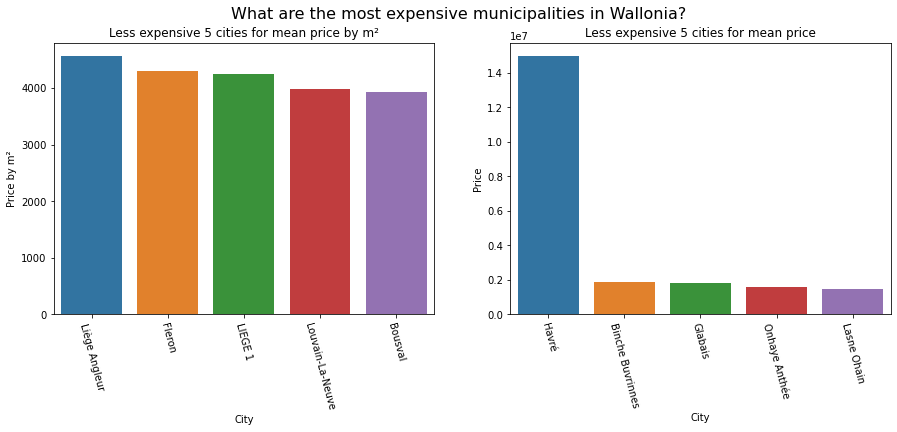

In [154]:
plt.figure(1, figsize=(15,5))
plt.suptitle("What are the most expensive municipalities in Wallonia?", fontsize=16)

cities = df[df.region_Wallonia == True].groupby(by="city")
cities = cities["price_by_m2"].agg(np.mean)
cities = pd.DataFrame(cities)
cities["city"] = cities.index 
cities.sort_values(by="price_by_m2", ascending=False, inplace=True)
plt.subplot(121)
sns.barplot(x="city", y="price_by_m2", data=cities.head())
plt.xticks(rotation=-75)
plt.title("Less expensive 5 cities for mean price by m²")
plt.xlabel("City")
plt.ylabel("Price by m²")


cities = df[df.region_Wallonia == True].groupby(by="city")
cities = cities["price"].agg(np.mean)
cities = pd.DataFrame(cities)
cities["city"] = cities.index 
cities.sort_values(by="price", ascending=False, inplace=True)
plt.subplot(122)
sns.barplot(x="city", y="price", data=cities.head())
plt.xticks(rotation=-75)
plt.title("Less expensive 5 cities for mean price")
plt.xlabel("City")
plt.ylabel("Price")

# What are the less expensive municipalities in Wallonia?

Text(0, 0.5, 'Price')

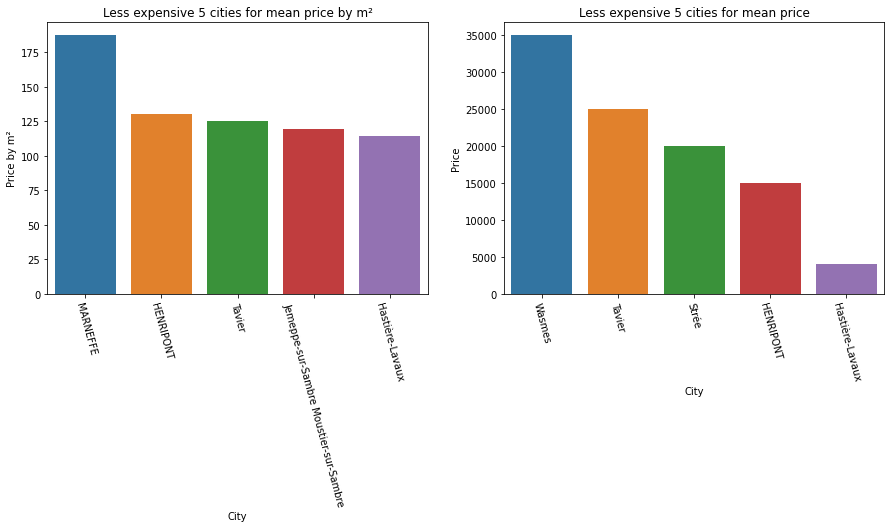

In [39]:
plt.figure(1, figsize=(15,5))
plt.suptitle("What are the less expensive municipalities in Wallonia?", fontsize=16)

cities = df[df.region_Wallonia == True].groupby(by="city")
cities = cities["price_by_m2"].agg(np.mean)
cities = pd.DataFrame(cities)
cities["city"] = cities.index 
cities.sort_values(by="price_by_m2", ascending=False, inplace=True)
plt.subplot(121)
sns.barplot(x="city", y="price_by_m2", data=cities.tail())
plt.xticks(rotation=-75)
plt.title("Less expensive 5 cities for mean price by m²")
plt.xlabel("City")
plt.ylabel("Price by m²")


cities = df[df.region_Wallonia == True].groupby(by="city")
cities = cities["price"].agg(np.mean)
cities = pd.DataFrame(cities)
cities["city"] = cities.index 
cities.sort_values(by="price", ascending=False, inplace=True)
plt.subplot(122)
sns.barplot(x="city", y="price", data=cities.tail())
plt.xticks(rotation=-75)
plt.title("Less expensive 5 cities for mean price")
plt.xlabel("City")
plt.ylabel("Price")

# What are the most expensive municipalities in Flanders?

Text(0, 0.5, 'Price')

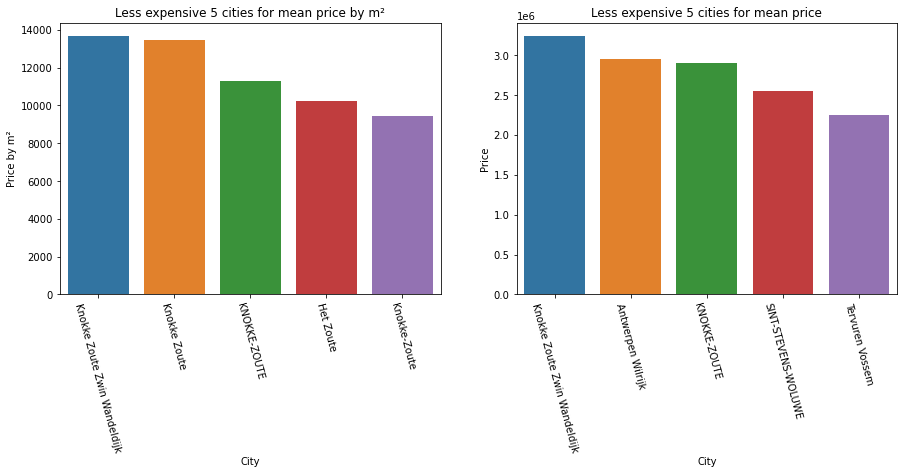

In [44]:
plt.figure(1, figsize=(15,5))
plt.suptitle("What are the most expensive municipalities in Flanders?", fontsize=16)

cities = df[df.region_Flanders == True].groupby(by="city")
cities = cities["price_by_m2"].agg(np.mean)
cities = pd.DataFrame(cities)
cities["city"] = cities.index 
cities.sort_values(by="price_by_m2", ascending=False, inplace=True)
plt.subplot(121)
sns.barplot(x="city", y="price_by_m2", data=cities.head())
plt.xticks(rotation=-75)
plt.title("Less expensive 5 cities for mean price by m²")
plt.xlabel("City")
plt.ylabel("Price by m²")


cities = df[df.region_Flanders == True].groupby(by="city")
cities = cities["price"].agg(np.mean)
cities = pd.DataFrame(cities)
cities["city"] = cities.index 
cities.sort_values(by="price", ascending=False, inplace=True)
plt.subplot(122)
sns.barplot(x="city", y="price", data=cities.head())
plt.xticks(rotation=-75)
plt.title("Less expensive 5 cities for mean price")
plt.xlabel("City")
plt.ylabel("Price")

# What are the less expensive municipalities in Flanders?

Text(0, 0.5, 'Price')

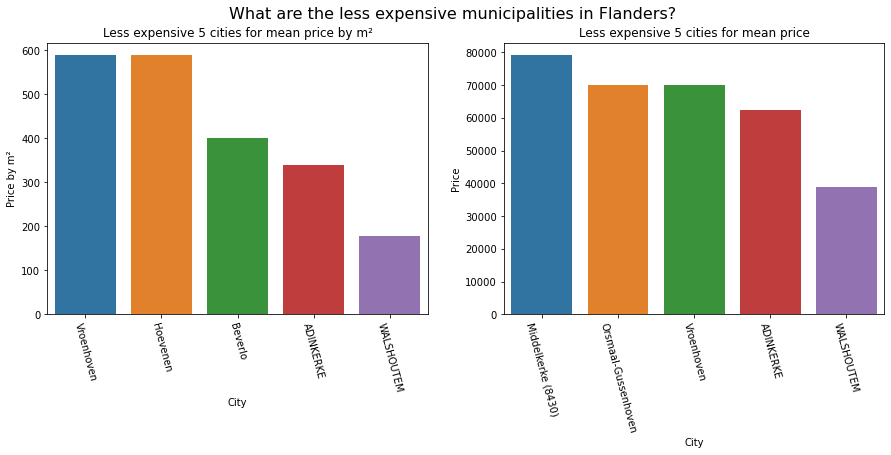

In [47]:
plt.figure(1, figsize=(15,5))
plt.suptitle("What are the less expensive municipalities in Flanders?", fontsize=16)

cities = df[df.region_Flanders == True].groupby(by="city")
cities = cities["price_by_m2"].agg(np.mean)
cities = pd.DataFrame(cities)
cities["city"] = cities.index 
cities.sort_values(by="price_by_m2", ascending=False, inplace=True)
plt.subplot(121)
sns.barplot(x="city", y="price_by_m2", data=cities.tail())
plt.xticks(rotation=-75)
plt.title("Less expensive 5 cities for mean price by m²")
plt.xlabel("City")
plt.ylabel("Price by m²")


cities = df[df.region_Flanders == True].groupby(by="city")
cities = cities["price"].agg(np.mean)
cities = pd.DataFrame(cities)
cities["city"] = cities.index 
cities.sort_values(by="price", ascending=False, inplace=True)
plt.subplot(122)
sns.barplot(x="city", y="price", data=cities.tail())
plt.xticks(rotation=-75)
plt.title("Less expensive 5 cities for mean price")
plt.xlabel("City")
plt.ylabel("Price")